In [1]:
import random
import matplotlib.pyplot as plt
import seaborn as sns

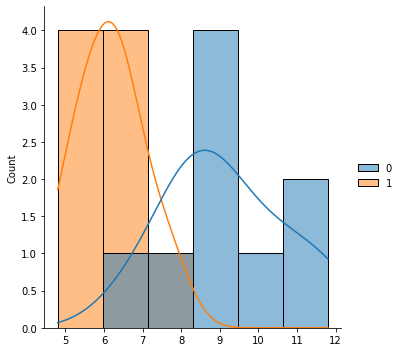

In [6]:
# data from noBSstats NHST draft
# see https://docs.google.com/spreadsheets/d/15EdOuy_Cb26xN1HCTSIktWhzYLFBjD4YirUTIL6EPGg/edit#gid=116739127

xE = [7.7, 5.9,  7, 4.8, 6.3, 6.3, 5.5, 5.4, 6.5]
xW = [11.8, 10, 11, 8.6, 8.3, 9.4,   8, 6.8, 8.5]

sns.displot((xW, xE), kde=True)

In [ ]:
# statistics computed from the samples
xEmean = sum(xE)/len(xE)
xWmean = sum(xW)/len(xW)
d = xEmean - xWmean

print('mean East beer price', xEmean)
print('mean West beer price', xWmean)
print('let d be the difference in means East-West. For beer samples collected, we observe d =', d)


mean East beer price 6.155555555555555
mean West beer price 9.155555555555555
let d be the difference in means East-West. For beer samples collected, we observe d = -3.0


## Randomization based sampling distr

Let's use the permutation test and the samples we've collected to simulate the distribution of d, difference between sample means, under H0

In [ ]:
# combined dataset (assumes E and W are the same, so we can combine in one dataset)
allprices = xE + xW


In [ ]:
# random.shuffle(data)
# data

In [ ]:
random.seed(42)
NUM_SIMS = 20000

samplingd = []   # store samples of d under the H0 distr

for it in range(NUM_SIMS):
    random.shuffle(allprices)
    eprices = allprices[0:len(xE)]  # first 9 assigned to East
    wprices = allprices[len(xE):]   # rest of values are West
    emean = sum(eprices)/len(eprices)
    wmean = sum(wprices)/len(wprices)
    dew = emean - wmean
    samplingd.append(dew)


<Figure size 432x288 with 0 Axes>

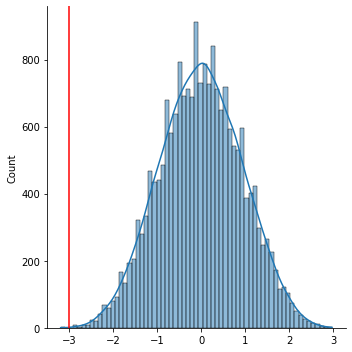

In [ ]:
# plot sampling disr and the d=-3 observed in the sameple:
plt.figure()
sns.displot(samplingd, kde=True)
plt.axvline(d, color='r')

In [ ]:
# number of differences observed less than or more extrme than d=-3 we observed:
p_value = len([dew for dew in samplingd if dew < d])/ len(samplingd)
p_value

5e-05

Therefore, p-value = 0.00005 tell us differeence E and W is significant. 

See also:
 - analytical approximation with z-test (population variance known)  
   https://colab.research.google.com/drive/1DSgC7oFR_s7sbnkyK9TwIejPz8wr6Sls 
 - analytical approximation with t-test (estimated variances)  
   https://colab.research.google.com/drive/1mDLJaE47Sz5OEhGsyTp-KjdMUL1h2DOm


